# Bathymetric particle filter 

This notebook is a testing and development environment for the geophysical particle filter. As of 30 December 2024 the initial implementation will be a velocity-state based implementation that does not do the proposed full state mechanization. The full state mechanization will be implemented in the future under a ROS2 and Gazebo simulation environment that allows for more realistic (and reliable) IMU simulation.

This notebook is meant for interactive testing and development and should not be used for large-scale simulations. The intended workflow is to use the notebook to test and develop the particle filter on a small subsample of test data, then build and install it in the local virtual environment for use in the full simulation.

This full simulation should then be written in the `/scripts` folder with result data saved off there.

## Simulation parameters verification

First we need to tune the particle filter propagation noise to be similar to that of a marine-grade inertial navigation system. A low-end marine-grade INS should have a drift of 1 nm per 24 hours. Our typical time interval is 60 seconds and the noise parameters for velocities states need to be tuned based on this value.

In [10]:
from src.geophysical.particle_filter import propagate_ned, rmse
import numpy as np

def run_velocity_loop(u:np.ndarray, noise:np.ndarray, dt:float = 60.0, time:int = 24*60) -> float:
    P = np.asarray([[0, 0, 0, u[0], u[1], u[2]]])
    T = P.copy()
    t = 0
    while t < time:
        P = propagate_ned(P, u, dt) #noise=np.diag(noise), noise_calibration_mode=True)
        # Add zero-mean noise to the particles
        P += np.random.multivariate_normal(np.zeros(6), np.diag(noise))
        T = propagate_ned(T, u, dt) #noise=np.diag([0, 0, 0]), noise_calibration_mode=False)
        t += 1
    error = rmse(P, T, include_altitude=True)
    return error

In [47]:
from tqdm import tqdm
import matplotlib.pyplot as plt

Running for 1 knots


100%|██████████| 1000/1000 [07:39<00:00,  2.18it/s]


Mean RMSE:  1901.31 meters
Running for 2 knots


100%|██████████| 1000/1000 [07:01<00:00,  2.37it/s]


Mean RMSE:  1895.94 meters
Running for 3 knots


100%|██████████| 1000/1000 [07:00<00:00,  2.38it/s]


Mean RMSE:  1887.02 meters
Running for 4 knots


100%|██████████| 1000/1000 [07:01<00:00,  2.37it/s]


Mean RMSE:  1888.92 meters
Running for 5 knots


100%|██████████| 1000/1000 [07:01<00:00,  2.37it/s]


Mean RMSE:  1890.85 meters
Running for 6 knots


100%|██████████| 1000/1000 [07:00<00:00,  2.38it/s]


Mean RMSE:  1885.78 meters
Running for 7 knots


100%|██████████| 1000/1000 [07:00<00:00,  2.38it/s]


Mean RMSE:  1887.33 meters
Running for 8 knots


100%|██████████| 1000/1000 [06:52<00:00,  2.42it/s]


Mean RMSE:  1886.65 meters
Running for 9 knots


100%|██████████| 1000/1000 [06:59<00:00,  2.38it/s]


Mean RMSE:  1886.63 meters
Running for 10 knots


100%|██████████| 1000/1000 [06:57<00:00,  2.39it/s]


Mean RMSE:  1885.73 meters
Running for 11 knots


100%|██████████| 1000/1000 [06:55<00:00,  2.41it/s]


Mean RMSE:  1883.85 meters
Running for 12 knots


100%|██████████| 1000/1000 [06:53<00:00,  2.42it/s]


Mean RMSE:  1882.30 meters
Running for 13 knots


100%|██████████| 1000/1000 [06:56<00:00,  2.40it/s]


Mean RMSE:  1882.90 meters
Running for 14 knots


100%|██████████| 1000/1000 [07:02<00:00,  2.37it/s]


Mean RMSE:  1883.98 meters
Running for 15 knots


100%|██████████| 1000/1000 [06:53<00:00,  2.42it/s]


Mean RMSE:  1885.90 meters
Running for 16 knots


100%|██████████| 1000/1000 [06:53<00:00,  2.42it/s]


Mean RMSE:  1886.54 meters
Running for 17 knots


100%|██████████| 1000/1000 [06:57<00:00,  2.40it/s]


Mean RMSE:  1886.62 meters
Running for 18 knots


100%|██████████| 1000/1000 [06:52<00:00,  2.43it/s]


Mean RMSE:  1885.48 meters
Running for 19 knots


100%|██████████| 1000/1000 [06:56<00:00,  2.40it/s]


Mean RMSE:  1885.32 meters
Running for 20 knots


100%|██████████| 1000/1000 [06:56<00:00,  2.40it/s]


Mean RMSE:  1884.92 meters
Running for 21 knots


100%|██████████| 1000/1000 [06:59<00:00,  2.39it/s]


Mean RMSE:  1886.11 meters
Running for 22 knots


100%|██████████| 1000/1000 [06:58<00:00,  2.39it/s]


Mean RMSE:  1887.12 meters
Running for 23 knots


100%|██████████| 1000/1000 [06:55<00:00,  2.41it/s]


Mean RMSE:  1886.95 meters
Running for 24 knots


100%|██████████| 1000/1000 [06:55<00:00,  2.41it/s]


Mean RMSE:  1887.64 meters
Running for 25 knots


100%|██████████| 1000/1000 [06:54<00:00,  2.42it/s]


Mean RMSE:  1888.97 meters
Overall RMSE: 1888.969172655573


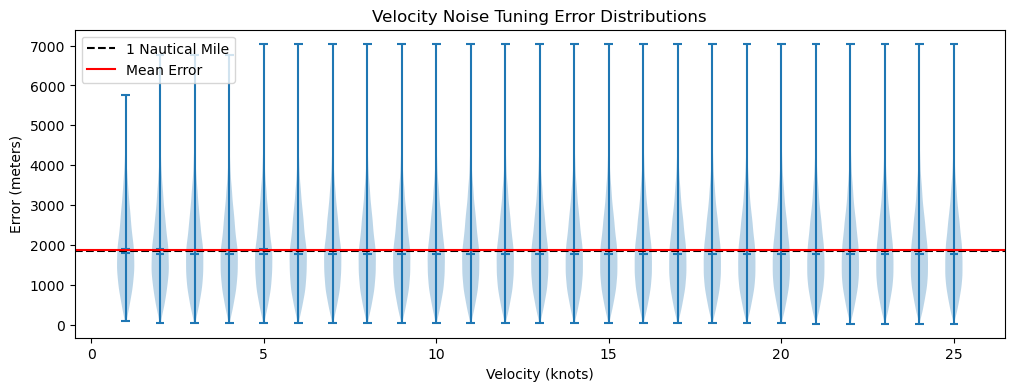

In [48]:
time = 24 * 60  # minutes
vel_noise = 1.75  # m/s
noise = np.array([0, 0, 0, vel_noise, vel_noise, 0.01])
bound = 1852  # meters
errors = []
errors_dict = {}
for i in range(1, 26): # 1 to 25 nautical miles per hour
    print(f"Running for {i} knots")
    v = i * bound / 3600  # convert to m/s
    for a in tqdm(range(1000)):
        # Eastward
        u = np.asarray([0.0, v, 0.0])
        errors.append(run_velocity_loop(u, noise))
        # Northward
        u = np.asarray([v, 0, 0])
        errors.append(run_velocity_loop(u, noise))
        # Northeastward
        u = np.array([1, 1, 0]) / np.linalg.norm([1, 1, 0])
        u *= v
        errors.append(run_velocity_loop(u, noise))
    errors_dict[i] = errors.copy()
    print(f"Mean RMSE: {np.mean(errors): 0.2f} meters")
print(f"Overall RMSE: {np.mean(errors)}")
# Plot the previous

plt.figure(figsize=(12, 4))
plt.violinplot(errors_dict.values(), showmeans=True, showmedians=True)
plt.axhline(y=1852, color='k', linestyle='--', label='1 Nautical Mile')
plt.axhline(np.mean(errors), color='r', linestyle='-', label='Mean Error')
plt.xlabel("Velocity (knots)")
plt.ylabel("Error (meters)")
plt.title("Velocity Noise Tuning Error Distributions")
plt.legend(loc="upper left")
plt.savefig("velocity_noise_tuning.png")
plt.show()


Finalized noise model: $\begin{bmatrix} 0 & 0 & 0 & 1.75 & 1.75 & 0.01 \end{bmatrix}$

---------

## Develop measurement model

Next we need to develop the measurement value standard deviation. We'll first do some general examination of the data. Namely, investigating the sensor measurements to see if we can build a reasonable sensor model.

In [49]:
from src.data_management import dbmgr

In [50]:
db = dbmgr.DatabaseManager(".db")
summary = db.get_all_trajectories()
summary = summary.drop(summary.index[-1])
bathy_trajectories = summary[summary["depth"]]

In [91]:
from src.geophysical import gmt_toolbox as gmt
from tqdm import tqdm

bathy_differences = np.empty((0,))

for id in tqdm(bathy_trajectories["id"]):
    data = db.get_trajectory(id)
    min_lon = data['lon'].min()
    max_lon = data['lon'].max()
    min_lat = data['lat'].min()
    max_lat = data['lat'].max()
    # min_lon, min_lat, max_lon, max_lat = gmt.inflate_bounds(min_lon, min_lat, max_lon, max_lat, 0.25)
    try:
        bathy_map = gmt.GeophysicalMap(gmt.MeasurementType.BATHYMETRY, 
                                   gmt.ReliefResolution.FIFTEEN_SECONDS, 
                                   min_lon, max_lon, min_lat, max_lat, 0.25)
    except AssertionError:
        if min_lat == max_lat:
            min_lat -= 0.25
            max_lat += 0.25
        if min_lon == max_lon:
            min_lon -= 0.25
            max_lon += 0.25
        bathy_map = gmt.GeophysicalMap(gmt.MeasurementType.BATHYMETRY, 
                                   gmt.ReliefResolution.FIFTEEN_SECONDS, 
                                   min_lon, max_lon, min_lat, max_lat, 0.1)
    except:
        print(f"Failed to get bathymetry map for {id}: {min_lon}, {max_lon}, {min_lat}, {max_lat}")
    #d_bathy = np.hstack([d_bathy, data["DEPTH"] - (-get_map_point(bathy_map, data.LON, data.LAT))])
    bathy_differences = np.append(bathy_differences, data["depth"] - (-bathy_map.get_map_point(data['lon'], data['lat'])))

bathy_mean_d = np.mean(bathy_differences, where=~np.isnan(bathy_differences))
bathy_std = np.std(bathy_differences, where=~np.isnan(bathy_differences))

  5%|▍         | 43/866 [01:28<02:35,  5.28it/s]  grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: SRTM15 Earth Relief v2.6 original at 15x15 arc seconds [Tozer et al., 2019].
grdblend [NOTICE]:   -> Download 10x10 degree grid tile (earth_relief_15s_p): N40E000
  8%|▊         | 72/866 [01:43<02:17,  5.78it/s]

Failed to get bathymetry map for 71: -17.91333, -17.53666, 51.81, 51.81166


  9%|▉         | 82/866 [01:49<13:22,  1.02s/it]grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: SRTM15 Earth Relief v2.6 original at 15x15 arc seconds [Tozer et al., 2019].
grdblend [NOTICE]:   -> Download 10x10 degree grid tile (earth_relief_15s_p): N30W090
 10%|▉         | 83/866 [02:27<2:40:18, 12.28s/it]grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: SRTM15 Earth Relief v2.6 original at 15x15 arc seconds [Tozer et al., 2019].
grdblend [NOTICE]:   -> Download 10x10 degree grid tile (earth_relief_15s_p): S30E060
 12%|█▏        | 106/866 [03:01<03:27,  3.67it/s] grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: SRTM15 Earth Relief v2.6 original at 15x15 arc seconds [Tozer et al., 2019].
grdblend [NOTICE]:   -> Download 10x10 degree grid tile (earth

Failed to get bathymetry map for 158: -72.84539, -72.84363, 27.7544, 27.76496


 20%|█▉        | 171/866 [09:58<01:50,  6.27it/s]grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: SRTM15 Earth Relief v2.6 original at 15x15 arc seconds [Tozer et al., 2019].
grdblend [NOTICE]:   -> Download 10x10 degree grid tile (earth_relief_15s_p): N20W070
 26%|██▌       | 227/866 [10:15<02:37,  4.05it/s]grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: SRTM15 Earth Relief v2.6 original at 15x15 arc seconds [Tozer et al., 2019].
grdblend [NOTICE]:   -> Download 10x10 degree grid tile (earth_relief_15s_p): N20W060
 29%|██▊       | 248/866 [10:27<02:28,  4.16it/s]

Failed to get bathymetry map for 251: -56.93179, -56.91025, 21.14666, 21.14924


 29%|██▉       | 253/866 [10:28<02:01,  5.04it/s]

Failed to get bathymetry map for 255: -56.94904, -56.94655, 21.14325, 21.14657


 30%|███       | 263/866 [10:30<02:17,  4.39it/s]

Failed to get bathymetry map for 265: -56.9387, -56.92815, 21.14376, 21.14536
Failed to get bathymetry map for 266: -56.93424, -56.92779, 21.14386, 21.14532


 32%|███▏      | 277/866 [10:33<02:15,  4.36it/s]grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: SRTM15 Earth Relief v2.6 original at 15x15 arc seconds [Tozer et al., 2019].
grdblend [NOTICE]:   -> Download 10x10 degree grid tile (earth_relief_15s_p): N10W060
 35%|███▌      | 306/866 [10:53<01:53,  4.95it/s]grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: SRTM15 Earth Relief v2.6 original at 15x15 arc seconds [Tozer et al., 2019].
grdblend [NOTICE]:   -> Download 10x10 degree grid tile (earth_relief_15s_p): N10W050
 40%|███▉      | 343/866 [11:10<01:39,  5.28it/s]

Failed to get bathymetry map for 347: -46.59278, -46.58718, 15.60165, 15.60237


 40%|████      | 348/866 [11:11<01:39,  5.20it/s]

Failed to get bathymetry map for 352: -46.56975, -46.56729, 15.62717, 15.63773


 43%|████▎     | 372/866 [11:16<02:03,  4.00it/s]

Failed to get bathymetry map for 377: -46.59166, -46.57954, 15.5686, 15.57011


 47%|████▋     | 403/866 [11:22<01:28,  5.22it/s]

Failed to get bathymetry map for 412: -46.66321, -46.64329, 16.25476, 16.25651


 49%|████▉     | 425/866 [11:26<01:14,  5.92it/s]

Failed to get bathymetry map for 434: -46.65994, -46.65032, 15.58778, 15.58888


 49%|████▉     | 428/866 [11:26<01:15,  5.81it/s]

Failed to get bathymetry map for 437: -46.64447, -46.64199, 15.58028, 15.58153
Failed to get bathymetry map for 438: -46.64422, -46.63855, 15.57977, 15.58217


 50%|████▉     | 432/866 [11:27<01:13,  5.92it/s]

Failed to get bathymetry map for 441: -46.64643, -46.64184, 15.58387, 15.58588


 50%|█████     | 434/866 [11:27<01:18,  5.48it/s]

Failed to get bathymetry map for 444: -46.64445, -46.64256, 15.60439, 15.61419


 51%|█████▏    | 444/866 [11:29<01:12,  5.81it/s]

Failed to get bathymetry map for 453: -46.62212, -46.62119, 16.2862, 16.34764
Failed to get bathymetry map for 454: -46.62255, -46.62168, 16.21749, 16.2828


 59%|█████▊    | 507/866 [11:39<00:58,  6.15it/s]grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: SRTM15 Earth Relief v2.6 original at 15x15 arc seconds [Tozer et al., 2019].
grdblend [NOTICE]:   -> Download 10x10 degree grid tile (earth_relief_15s_p): N20W050
 62%|██████▏   | 534/866 [11:54<01:12,  4.59it/s]

Failed to get bathymetry map for 543: -45.02631, -45.02563, 23.31807, 23.32316


 63%|██████▎   | 543/866 [11:57<01:25,  3.79it/s]

Failed to get bathymetry map for 553: -45.03543, -45.02689, 23.33412, 23.33531


 63%|██████▎   | 544/866 [11:57<01:23,  3.85it/s]

Failed to get bathymetry map for 559: -45.04169, -45.03427, 23.33071, 23.33144


 71%|███████▏  | 618/866 [12:10<00:40,  6.12it/s]

Failed to get bathymetry map for 634: -44.97879, -44.97785, 23.2962, 23.30949
Failed to get bathymetry map for 635: -44.97864, -44.97755, 23.30697, 23.30947


 72%|███████▏  | 620/866 [12:10<00:41,  5.92it/s]

Failed to get bathymetry map for 636: -44.97871, -44.97701, 23.30818, 23.30939


 72%|███████▏  | 622/866 [12:10<00:42,  5.69it/s]

Failed to get bathymetry map for 638: -44.97742, -44.97624, 23.32145, 23.33379


 84%|████████▍ | 730/866 [12:28<00:19,  7.01it/s]

Failed to get bathymetry map for 750: -42.13364, -42.12954, 30.15546, 30.15772


 85%|████████▍ | 733/866 [12:29<00:27,  4.76it/s]

Failed to get bathymetry map for 754: -42.13247, -42.13038, 30.16794, 30.17642


 86%|████████▌ | 741/866 [12:30<00:22,  5.59it/s]

Failed to get bathymetry map for 761: -42.16114, -42.15934, 30.11502, 30.12017


 88%|████████▊ | 758/866 [12:33<00:24,  4.38it/s]

Failed to get bathymetry map for 790: -41.95834, -41.95674, 30.16678, 30.16715


 89%|████████▉ | 769/866 [12:35<00:16,  5.97it/s]

Failed to get bathymetry map for 801: -41.96858, -41.9671, 30.13248, 30.13593


 89%|████████▉ | 772/866 [12:36<00:17,  5.32it/s]

Failed to get bathymetry map for 803: -41.96517, -41.96375, 30.14824, 30.15797


100%|█████████▉| 865/866 [12:56<00:00,  6.14it/s]

Failed to get bathymetry map for 902: -25.66404, -25.66327, 37.73444, 37.73501


grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: SRTM15 Earth Relief v2.6 original at 15x15 arc seconds [Tozer et al., 2019].
grdblend [NOTICE]:   -> Download 10x10 degree grid tile (earth_relief_15s_p): N10W090
100%|██████████| 866/866 [13:55<00:00,  1.04it/s]


In [143]:
from scipy.stats import mode

def plot_measurement_statistics(data:np.ndarray, title:str, xlabel:str, ylabel:str, filename:str, bin_count:int=1000, xlims:tuple=None):
    Mean = np.mean(data, where=~np.isnan(data))
    Std = np.std(data, where=~np.isnan(data))
    Median = np.median(data[~np.isnan(data)])
    Mode = mode(data[~np.isnan(data)]).mode
    plt.figure(figsize=(8, 4))
    plt.hist(data, bins=bin_count, density=True, alpha=0.75)
    plt.axvline(Mean, color='r', linestyle='--', label=f'Mean={Mean:0.2f}')
    plt.axvline(Mean + Std, color='k', linestyle='--', label=f'$\pm\sigma={Std:0.2f}$')
    plt.axvline(Mean - Std, color='k', linestyle='--')
    plt.axvline(Median, color='g', linestyle='--', label=f'Median={Median:0.2f}')
    plt.axvline(Mode, color='b', linestyle='--', label=f'Mode={Mode:0.2f}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if xlims is not None:
        plt.xlim(xlims)
    plt.title(title)
    plt.legend(loc="upper left")
    plt.savefig(filename)
    plt.show()

<>:11: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_82716/53378082.py:11: SyntaxWarning: invalid escape sequence '\p'
  plt.axvline(Mean + Std, color='k', linestyle='--', label=f'$\pm\sigma={Std:0.2f}$')


Using the above, let's plot the data and see if we can build a reasonable sensor model.

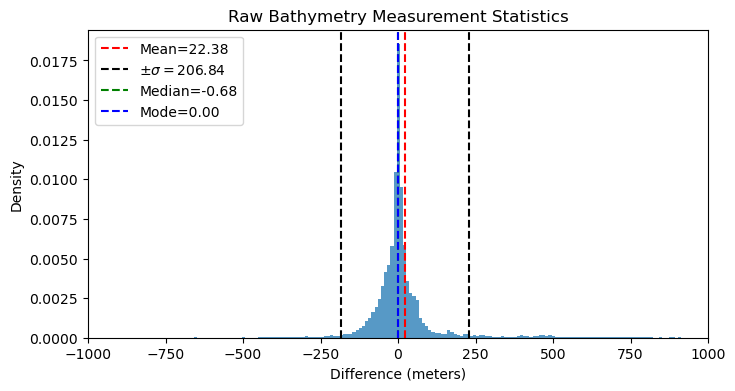

Max: 4921.768287999863


In [146]:
plot_measurement_statistics(bathy_differences, "Raw Bathymetry Measurement Statistics", "Difference (meters)", "Density", "bathy_diff_stats_raw.png", xlims=(-1000, 1000))
print(f"Max: {np.max(bathy_differences[~np.isnan(bathy_differences)])}")

So from the above we can see that the data resembles a normal distribution, but has some substantial outliers. So let's filter out the outliers and then plot the data again.

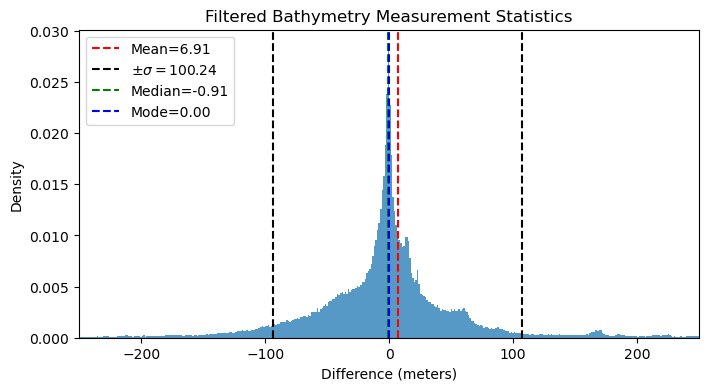

In [147]:
# Filter out the outliers
bathy_differences_filtered = bathy_differences[np.abs(bathy_differences - bathy_mean_d) < 3 * bathy_std]
plot_measurement_statistics(bathy_differences_filtered, "Filtered Bathymetry Measurement Statistics", "Difference (meters)", "Density", "bathy_diff_stats_filtered.png", xlims=(-250, 250))

With the filtered data we can see that the data is much more normally distributed. We can now use this data to build a sensor model for the particle filter. This model is a simple zero-mean normal distribution with a standard deviation of 100 meters.

--------------------

In [5]:
from src.data_management import m77t as tbx
import os       
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pyins import strapdown, transform, measurements, filters, sim
from src.geophysical import gmt_toolbox as gmt
from anglewrapper import wrap

In [6]:
filepath = os.path.join("test", "test_data.m77t")

In [7]:
datain = tbx.process_m77t_file(filepath)
traj = datain[2].copy()
traj_ins = traj.copy()
traj_ins.index = traj.index.to_series().diff().dt.total_seconds().fillna(0).cumsum()

increments = strapdown.compute_increments_from_imu(traj_ins, "rate")
#increments = increments.rolling(window=5, min_periods=1).mean()
observations = measurements.Position(sim.generate_position_measurements(traj_ins[["lat", "lon", "alt"]], 5.0), 5.0)
init_pva = traj_ins.loc[
    traj_ins.index[0],
    ["lat", "lon", "alt", "VN", "VE", "VD", "roll", "pitch", "heading"],
]
distance = traj_ins["distance"].to_numpy()

In [8]:
# Run the filter
integrator = strapdown.Integrator(init_pva, True)
integrator.integrate(increments)

feedback = filters.run_feedback_filter(
    init_pva,
    5,
    2,
    1,
    1,
    increments,
    measurements=[observations],
    time_step=1.0,
    with_altitude=True,
)
ins_errors = transform.compute_state_difference(traj_ins, feedback.trajectory)
integrator_error = transform.compute_state_difference(traj_ins, integrator.trajectory)

In [ ]:
# Plot the results as a function of distance traveled
plt.plot(
    distance / 1852,
    100 * np.sqrt(ins_errors.north**2 + ins_errors.east**2) / distance,
    'g.',
    label="INS error",
)
plt.plot(
    distance / 1852,
    100 * np.sqrt(integrator_error.north**2 + integrator_error.east**2) / distance,
    'r.',
    label="integrator error",
)
plt.xlabel("Distance traveled (nmi)")
plt.ylabel("Position error (% of distance traveled)")
plt.title("Radial position error vs. distance traveled")
plt.legend()
plt.show()

In [ ]:
plt.plot(traj_ins.lon, traj_ins.lat, 'k.', label="Truth")
plt.plot(integrator.trajectory.lon, integrator.trajectory.lat, 'r.', label="Integrator")
plt.plot(feedback.trajectory.lon, feedback.trajectory.lat, 'g.', label="INS")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("2D trajectory")
plt.legend()
plt.show()

In [ ]:
from matplotlib import pyplot as plt

if not os.path.exists(".db/plots"):
    os.makedirs(".db/plots")

plt.hist(errors, bins=15, density=True)
plt.xlabel("RMSE (m)")
plt.ylabel("Frequency")
plt.title("RMSE of Particle Filter")
plt.savefig(".db/plots/propagation_tuning.png")
plt.show()

In [ ]:
config = {"velocity_noise": [noise[1], noise[1], 0]}

In [ ]:
plt.hist(d_bathy, bins=200, density=True)
plt.xlim([-300, 300])
plt.xlabel("Depth Difference (m)")
plt.ylabel("Frequency")
plt.title("Bathymetry Difference")
plt.savefig(".db/plots/bathy_diff.png")
plt.show()

In [ ]:
config

In [ ]:
import json

with open("config.json", "w") as f:
    json.dump(config, f)

### Populate with velocities

In [ ]:
from src.particle_filter import (
    process_particle_filter,
    populate_velocities,
    plot_error,
    plot_estimate,
    summarize_results,
)
import json
import src.process_dataset as pdset
from tqdm import tqdm
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
tables = pdset.get_tables(".db/parsed.db")
bathy_tables = [table for table in tables if "_D_" in table]
config = json.load(open("config.json", "r"))
config["n"] = 1000
config["cov"] = [
    1 / 60,
    1 / 60,
    0,
    config["velocity_noise"][0],
    config["velocity_noise"][1],
    0,
]

with open("config.json", "w") as f:
    json.dump(config, f)

In [ ]:
config

In [ ]:
df = pdset.table_to_df(".db/parsed.db", bathy_tables[3])

In [ ]:
len(df)

In [ ]:
if not os.path.exists(".db/plots2/estimate/"):
    os.makedirs(".db/plots2/estimate/")

if not os.path.exists(".db/plots2/errors/"):
    os.makedirs(".db/plots2/errors/")

summary = None
annotations = {"recovery": 1852, "res": 1852 / 4}
# for table in tqdm(bathy_tables):
#     print(f"Running {table}")
#     df = pdset.table_to_df(".db/parsed.db", table)

df = populate_velocities(df)
results, geo_map = process_particle_filter(df, config)
print("Run complete! Saving results...")
pdset.save_dataset(
    [results],
    ["test"],
    output_location=".db",
    output_format="db",
    dataset_name="results",
)

In [ ]:
print("Results saved! Plotting...")
fig, ax = plot_estimate(geo_map, results)
fig.savefig(f".db/plots2/estimate/test_estimate.png")
plt.close(fig)
fig, ax = plot_error(results, annotations=annotations)
fig.savefig(f".db/plots2/errors/test_error.png")
plt.close(fig)

In [ ]:
summary = None
results_tables = pdset.get_tables(".db/results.db")
for table in results_tables:
    df = pdset.table_to_df(".db/results.db", table)
    run = summarize_results(df, 1852)
    run["Name"] = table
    if summary is None:
        summary = run  # .copy()
    else:
        summary = pd.concat([summary, run], ignore_index=True)
    summary.to_csv(".db/summary_recovery.csv")

In [ ]:
summary = None
results_tables = pdset.get_tables(".db/results.db")
for table in results_tables:
    df = pdset.table_to_df(".db/results.db", table)
    run = summarize_results(df, 452)
    run["Name"] = table
    if summary is None:
        summary = run  # .copy()
    else:
        summary = pd.concat([summary, run], ignore_index=True)
    summary.to_csv(".db/summary_resolution.csv")

# Data Post Processing

Use this section to load and post process the results data set

In [ ]:
import src.process_dataset as pdset
import pandas as pd
import matplotlib.pyplot as plt
from src.particle_filter import summarize_results
import os
from datetime import timedelta

In [ ]:
results_tables = pdset.get_tables(".db/results.db")
len(results_tables)

In [ ]:
for table in results_tables:
    table_df = pdset.table_to_df(".db/results.db", table)
    summary = summarize_results(table, table_df, 1852)
    summary.to_csv(
        ".db/plots/summary.csv",
        mode="a",
        header=(not os.path.exists(".db/plots/summary.csv")),
    )

In [ ]:
summary = pd.read_csv(
    ".db/plots/summary.csv",
    header=0,
    dtype={
        "": int,
        "name": str,
        "start": str,
        "stop": str,
        "duration": str,
        "average_error": float,
        "max_error": float,
        "min_error": float,
    },
)
summary["num"] = summary["Unnamed: 0"]
summary = summary.drop(columns=["Unnamed: 0"])
# summary['start'] = pd.to_datetime(summary['start'], format="%Y-%m-%d %H:%M:%S%z")
# summary['end'] = pd.to_datetime(summary['end'], format="%Y-%m-%d %H:%M:%S%z")
summary["start"] = pd.to_timedelta(summary["start"])
summary["end"] = pd.to_timedelta(summary["end"])
summary["duration"] = pd.to_timedelta(summary["duration"])
summary.head()

len(summary)

In [ ]:
summary.head()

In [ ]:
recovery = summary.loc[summary["min error"] > 452]
len(recovery)

In [ ]:
# check to see if all the tables in results_tables are present in summary["name"] and if not capture the missing tables
missing = []
for table in results_tables:
    if table not in summary["name"].values:
        missing.append(table)

total = len(results_tables)
num_recoveries = total - len(missing)
print(
    f"There are {total} total trajectories. We were able to recover at least one position fix below drift error in {num_recoveries} ({num_recoveries / total :0.4f}) trajectories."
)

In [ ]:
pixel = summary.loc[summary["min error"] <= 452]

# check to see if the tables in pixel are present in summary["name"] and if not capture the missing tables
missing = []
for table in results_tables:
    if table not in pixel["name"].values:
        missing.append(table)
below_pixel_fixes = total - len(missing)

print(
    f"There are {len(pixel)} total below pixel resolution fixes. We were able to achieve at least one position estimate below drift error in {below_pixel_fixes} ({below_pixel_fixes/total :0.4f}) trajectories."
)
print(f"mean duration: {pixel['duration'].mean()} and median duration: {pixel['duration'].median()}")
print(f"mean error: {pixel['min error'].mean()} and median error: {pixel['min error'].median()}")
print(f"minium duration: {pixel['duration'].min()} and maximum duration: {pixel['duration'].max()}")
print(f"minimum error: {pixel['min error'].min()} and maximum error: {pixel['min error'].max()}")
print(f"mean start: {pixel['start'].mean()} and median start: {pixel['start'].median()}")

In [ ]:
summary.sort_values(by="min error").head(3)

In [ ]:
summary.sort_values(by="start").head(3)

In [ ]:
summary.sort_values(by="duration").tail(3)

In [ ]:
summary.sort_values(by="average_error").head(3)

In [ ]:
# Find the line in summary that has the closest to the mean duration
summary.loc[abs(summary["duration"] - summary["duration"].median()) <= timedelta(minutes=1)]

In [ ]:
summary["duration"].median()

In [ ]:
print(
    f"On average we were able to recover a position fix with an mean duration of {summary['duration'].mean()}, median duration of {summary['duration'].median()} and a mean error of {summary['average_error'].mean()} and median error {summary['average_error'].median()}."
)

print(f"Minimum duration {summary['duration'].min()} and maximum duration {summary['duration'].max()}.")
print(f"Minimum error {summary['average_error'].min()} and maximum error {summary['average_error'].max()}.")

In [ ]:
first = summary.loc[summary["num"] == 0]
# first.head()

print(
    f"The first position recover occurs with a mean of {first['start'].mean()} and median {first['start'].median()} after the start of the trajectory."
)
print(
    f"with an mean duration of {first['duration'].mean()}, median duration of {first['duration'].median()} and a mean error of {first['average_error'].mean()} and median error {first['average_error'].median()}."
)

print(f"Minimum duration {first['duration'].min()} and maximum duration {first['duration'].max()}.")
print(f"Minimum error {first['average_error'].min()} and maximum error {first['average_error'].max()}.")

# Gravity

Recreate the above simulation and measurment model development this time with gravity

In [ ]:
from src.gmt_tool import inflate_bounds, get_map_section, get_map_point
import src.process_dataset as pdset
import numpy as np
import json
from matplotlib import pyplot as plt
import os

config = json.load(open("config.json", "r"))
tables = pdset.get_tables(".db/parsed.db")
gravity_tables = [table for table in tables if "_G_" in table]

In [ ]:
d_gravity = np.array([])

for table in gravity_tables:
    data = pdset.table_to_df(".db/parsed.db", table)
    min_lon = data.LON.min()
    max_lon = data.LON.max()
    min_lat = data.LAT.min()
    max_lat = data.LAT.max()
    min_lon, min_lat, max_lon, max_lat = inflate_bounds(min_lon, min_lat, max_lon, max_lat, 0.25)
    gravity_map = get_map_section(min_lon, max_lon, min_lat, max_lat, "gravity", "01m", "temp")
    d_gravity = np.hstack([d_gravity, data["GRAV_ANOM"] - get_map_point(gravity_map, data.LON, data.LAT)])

config["gravity_mean_d"] = np.mean(d_gravity, where=~np.isnan(d_gravity))
config["gravity_std"] = np.std(d_gravity, where=~np.isnan(d_gravity))

if os.path.exists("config.json"):
    # delete the file
    os.remove("config.json")

with open("config.json", "w") as f:
    json.dump(config, f)

plt.hist(d_gravity, bins=100, density=True)
plt.xlim([-50, 75])
plt.xlabel("Gravity Difference (mGal)")
plt.ylabel("Frequency")
plt.title("Gravity Anomaly Difference")
plt.savefig(".db/plots/gravity_diff.png")
plt.show()

# Magnetics

Recreation with magnetics

In [ ]:
from src.gmt_tool import inflate_bounds, get_map_section, get_map_point
import numpy as np
import json

config = json.load(open("config.json", "r"))
tables = pdset.get_tables(".db/parsed.db")
mag_tables = [table for table in tables if "_M_" in table]

df = pdset.table_to_df(".db/parsed.db", mag_tables[0])
df.head()

In [ ]:
d_magnetics = np.array([])

for table in mag_tables:
    data = pdset.table_to_df(".db/parsed.db", table)
    min_lon = data.LON.min()
    max_lon = data.LON.max()
    min_lat = data.LAT.min()
    max_lat = data.LAT.max()
    min_lon, min_lat, max_lon, max_lat = inflate_bounds(min_lon, min_lat, max_lon, max_lat, 0.25)
    mag_map = get_map_section(min_lon, max_lon, min_lat, max_lat, "magnetic", "02m", "temp")
    d_magnetics = np.hstack([d_magnetics, data["MAG_RES"] - get_map_point(mag_map, data.LON, data.LAT)])

config["magnetic_mean_d"] = np.mean(d_magnetics, where=~np.isnan(d_magnetics))
config["magnetic_std"] = np.std(d_magnetics, where=~np.isnan(d_magnetics))

if os.path.exists("config.json"):
    # delete the file
    os.remove("config.json")

with open("config.json", "w") as f:
    json.dump(config, f)

In [ ]:
plt.hist(d_magnetics, bins=100, density=True)
plt.xlim([-500, 500])
plt.xlabel("Magnetic Difference (nT)")
plt.ylabel("Frequency")
plt.title("Magnetic Residual Difference")
plt.savefig(".db/plots/mag_diff.png")
plt.show()

In [ ]:
if not "":
    print("EMPTY")

In [ ]:
st = [str(i) for i in range(10)]

In [ ]:
ST = "".join(st)

In [ ]:
ST

In [ ]:
"A" in "AaBbCc"

In [ ]:
trx, names = tbx.parse_trackline_from_file("./test/test_data.csv")

In [ ]:
names

In [ ]:
if not []:
    print("EMPTY")

In [ ]:
"G" in "DMG"

In [ ]:
import pandas as pd

In [ ]:
pd.read_csv("78123006.csv")

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(
    "./test/test_data.m77t",
    header=0,
    index_col=0,
    parse_dates=True,
    dtype={
        "LAT": float,
        "LON": float,
        "CORR_DEPTH": float,
        "MAG_TOT": float,
        "MAG_RES": float,
        "GRA_OBS": float,
        "FREEAIR": float,
    },
)

In [ ]:
df.head()

In [ ]:
df.drop("AB")

In [ ]:
from src.data_manager import m77t as tbx
import pandas as pd

In [ ]:
data = tbx.read_m77t("./source_data/78123006.m77t")
data = tbx.m77t_to_df(data)

In [ ]:
schema = pd.io.json.build_table_schema(data)
schema

In [ ]:
from sqlalchemy import create_engine


def get_engine(server, database, username, password):
    """Creates and returns an SQLAlchemy engine for SQL Server."""
    connection_string = f"mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server"
    engine = create_engine(connection_string)
    return engine

In [ ]:
from sqlalchemy import Table, Column, Integer, String, MetaData, select
from sqlalchemy.dialects.mssql import NVARCHAR, FLOAT

metadata = MetaData()

# Define your table schema as reflected from the database or defined by your application
collections = Table(
    "Collections",
    metadata,
    Column("CollectionID", Integer, primary_key=True),
    Column("CollectionName", NVARCHAR(255), nullable=False),
    Column("Description", NVARCHAR("max")),
)


def insert_collection(engine, collection_name, description=""):
    """Insert a new collection using SQLAlchemy and return its CollectionID."""
    insert_stmt = collections.insert().values(CollectionName=collection_name, Description=description)
    with engine.connect() as conn:
        result = conn.execute(insert_stmt)
        conn.commit()
        collection_id = result.inserted_primary_key[0]  # Get the primary key of the inserted record
    return collection_id


def upload_data(df, collection_id, engine):
    """Uploads data from a DataFrame to the RawData table, linking it to the specified CollectionID."""
    df["CollectionID"] = collection_id  # Add CollectionID to the DataFrame
    df.to_sql(name="RawData", con=engine, if_exists="append", index=False)


def query_data_by_collection(collection_id, engine):
    """Queries data for a specific collection and returns it as a DataFrame."""
    query = f"SELECT * FROM RawData WHERE CollectionID = {collection_id}"
    return pd.read_sql_query(query, con=engine)

In [ ]:
data.head()

In [ ]:
engine = get_engine("localhost", "geonavdb", "sa", "2016SpringGardenStreet!")

In [ ]:
col_id = insert_collection(engine, "test_collection", "This is a test collection")